# Difference between untagged data in different versions of the code
last edit Sep-14, 2022

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

# (1) Load data:

In [3]:
main_data_path = '/Users/erezcohen/Desktop/data/BAND/'
subdirnames    = ["sidisdvcs_v29July_commit_338982b",
                  "sidisdvcs_v15Aug2022_commit_6d0bfd1",
                  "sidisdvcs_v17Sep2022_commit_ea348cc"]
subdirlabels   = ["July-29 (338982b)","Aug-15 (6d0bfd1)","Sep-17 (ea348cc)"]
subdircolors   = ['k','r','b','forestgreen']
# "Aug_9_commit_2021402",# "Sep-14 (741b80a)",
# subdirnames    = ["July_29_commit_338982b","Aug","Sep_14_Wcut0.5_commit_869e7a8","Sep_14_Wcut2.5_commit_741b80a","sidisdvcs_v14Sep2022_Wcut2.5_commit_741b80a"]

In [4]:
Nruns = 4

In [5]:
eepi,eepi_pass_cuts = dict(),dict()
for subdirname in subdirnames:
    print(subdirname)
    print('-------------')
    eepi[subdirname],_,_ = load_SIDIS_data( Nruns = Nruns,fdebug=0,
                    main_data_path = main_data_path,
                    subdirname = subdirname,
                    do_e_e_pi = True, do_e_e_pi_n = False, do_e_e_pi_FreeP=False, 
                    do_all_vars=True)
    eepi_pass_cuts[subdirname],_,_,_ = apply_further_selection_cuts_to_data(doApply_Mx_cut=False, fdebug=0);
    print()
print('Done.')

sidisdvcs_v29July_commit_338982b
-------------
Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,e π+ )
1527104 events after original cut (100.0 %)
1111533 events after p-theta cut (72.8 %)
1111533 events after Mx cut (72.8 %)
1111533 events after Kinematical cut (72.8 %)
(e,e π- )
682118 events after original cut (100.0 %)
663571 events after p-theta cut (97.3 %)
663571 events after Mx cut (97.3 %)
663568 events after Kinematical cut (97.3 %)
 
Done applying event-selection cuts

sidisdvcs_v15Aug2022_commit_6d0bfd1
-------------
Done loading files.
Applying selection cuts not previously imposed
(1) Applying cuts to d(e,e'π) data
Apply a π+/π- acceptance matching cut on the in p-theta plane
(e,e π+ )
1012857 events after original cut (100.0 %)
686855 events after p-theta cut (67.8 %)
686855 events after Mx cut (67.8 %)
686855 events after Kinematical cut (67.8 %)
(e,e π-

# (2) Monitoring plots

In [6]:
def plot_monitor_var(var,vlabel,bins,run=None,df_dict_arr=eepi):
    fig = plt.figure(figsize=(16,6), tight_layout=True)

    for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
        ax = fig.add_subplot(1,2,pi_idx)
        title_str = "$(e,e'"+pi_print+")$"
        if run is not None:
            title_str = title_str + ", run %d"%run
            
        for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
            df = df_dict_arr[subdirname][pi_ch]
            if run is not None:
                df = df[df.runnum==run]                
                # print(len(df),'events')
            plot_step_hist( df[var], bins=bins, density=False,
                           color=subdircolor, label=subdirlabel)
        set_axes(ax,vlabel,
                 'Frequency [a.u.]' , 
                 title=title_str,
                 do_add_grid=True, do_add_legend=True if pi_idx==2 else False);    

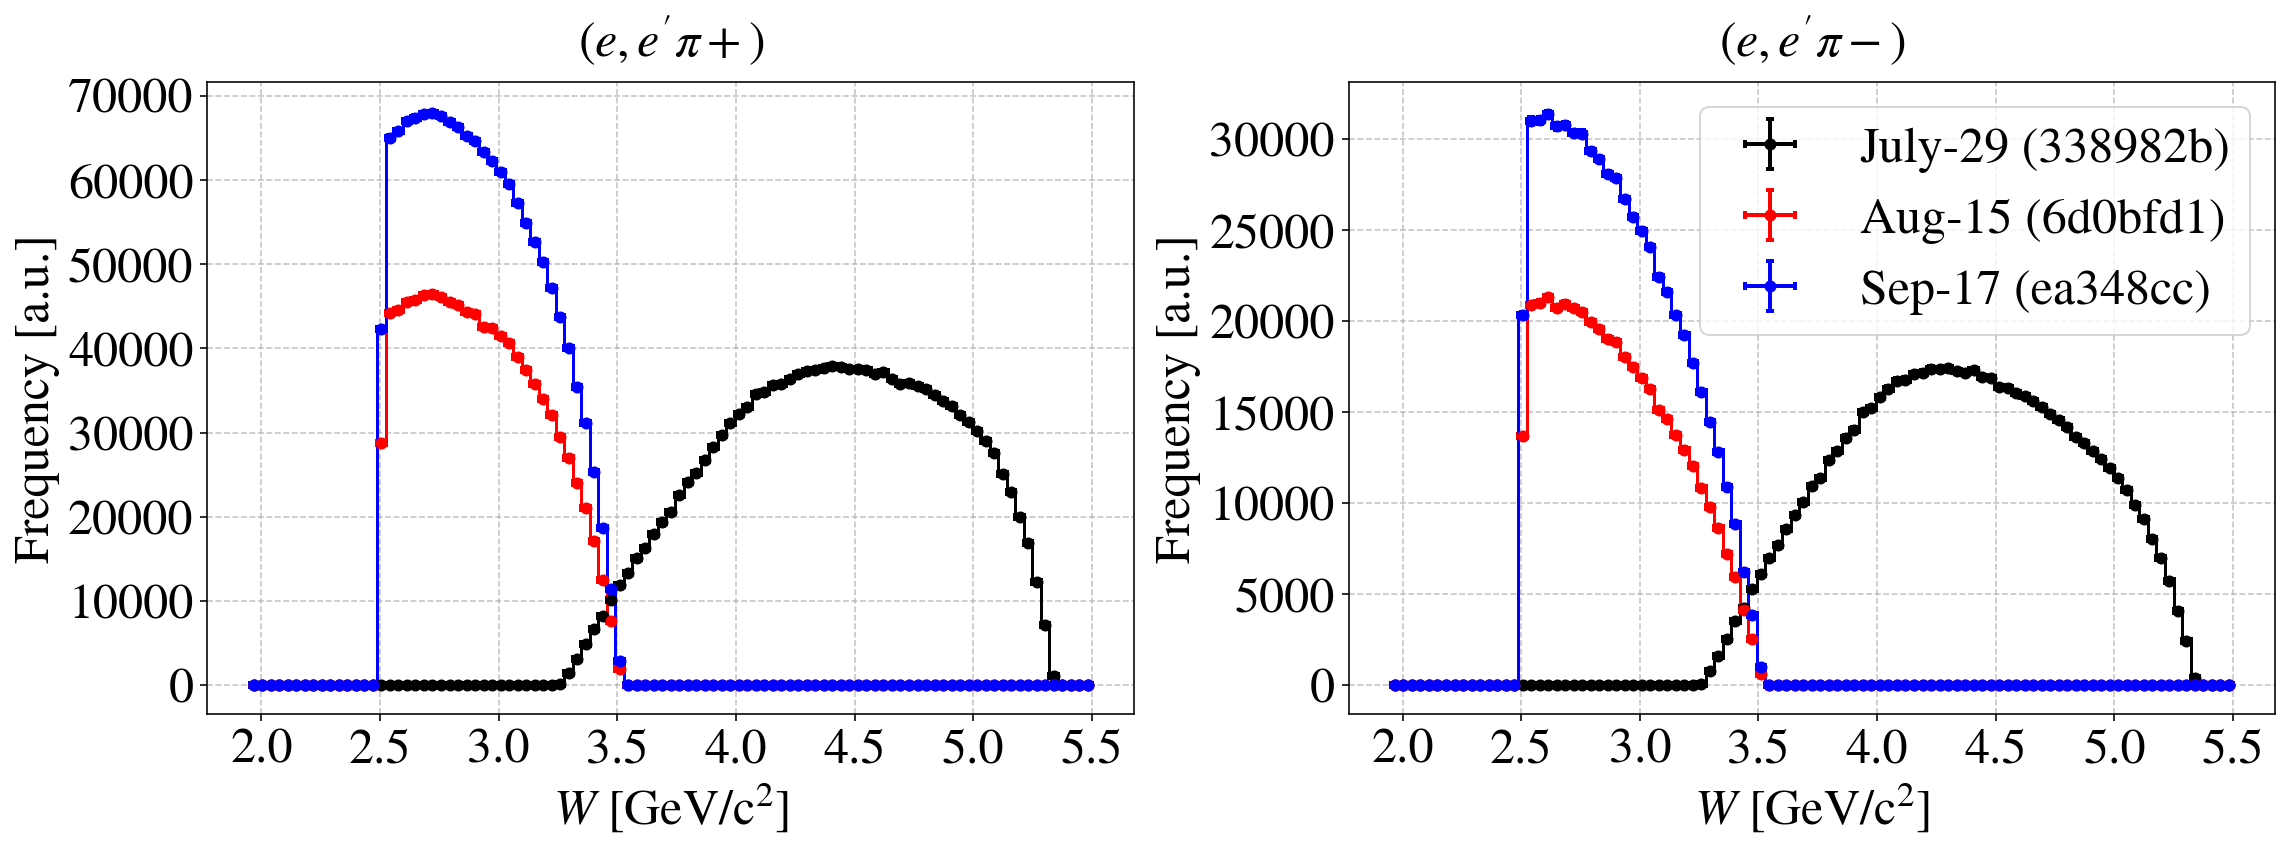

In [7]:
# var,vlabel,bins = 'evnum',"evnum",np.linspace(0.622e8,0.623e8,100)# np.linspace(0,1.5e8,100)#np.linspace(0.622e8,0.623e8,100)# np.linspace(0,1.5e8,100)
# var,vlabel,bins = 'W',"$W$ [GeV/c$^2$]",np.linspace(2.3,5.5,100)
plot_monitor_var( 'W',"$W$ [GeV/c$^2$]",np.linspace(1.95,5.5,100) )

# (3) What is the difference between the data sets specifically for $W>2.5$ GeV ?

In [8]:
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    print(subdirlabel)
    for pi_ch in pi_charge_names:
        # df = df_dict[pi_ch]
        df = eepi_pass_cuts[subdirname][pi_ch]        
        print(len(df),pi_ch,'events with W>%.1f'%np.min(df.W),'GeV/c2')
    print()

July-29 (338982b)
1111533 piplus events with W>2.9 GeV/c2
663568 piminus events with W>2.9 GeV/c2

Aug-15 (6d0bfd1)
686855 piplus events with W>2.5 GeV/c2
410876 piminus events with W>2.5 GeV/c2

Sep-17 (ea348cc)
1012047 piplus events with W>2.5 GeV/c2
607231 piminus events with W>2.5 GeV/c2



# (4) Extract cross-section from each data set and check differences

In [9]:
z_bins   = np.arange(0.3,0.85,0.05)
z_widths = 0.01*np.ones(len(z_bins))
x_bins   = np.linspace(0.2,0.6,11)
x        = (x_bins[1:] + x_bins[:-1])/2
x_err    = (x_bins[1:] - x_bins[:-1])/2
print('x bins:',x_bins)
print('z bins:',z_bins)
var,var_label,xlabel = 'xB', "standing proton x", "Bjorken $x$"

x bins: [0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6 ]
z bins: [0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8 ]


In [10]:
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/CodeVersionDifferences/'
prefix    = 'Untagged_SIDIS_ratio_'

In [11]:
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    extract_SIDIS_ratio(df_dict  = eepi_pass_cuts[subdirname],
                        data_path= data_path,
                        x_var    = var ,
                        x_bins = x_bins,z_bins   = z_bins,z_widths = z_widths,                           
                        prefix   = prefix,
                        suffix   = subdirname )
print('Done extracting SIDIS cross-sections')

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:309: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:310: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:311: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


In [12]:
prefix = 'Untagged_SIDIS_ratio_'

SIDIS_res = dict()
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    suffix = subdirname
    SIDIS_res[suffix] = load_SIDIS_ratio(prefix = prefix, 
                                         suffix = suffix, 
                                         doPlotResults=False, data_path=data_path)

    
    results = SIDIS_res[suffix]
    z_arr[suffix],z_err_arr[suffix],R_arr[suffix],R_errup_arr[suffix],R_errdw_arr[suffix] = [],[],[],[],[]
    for key in results.keys():
        z_min = float(key[4:9])
        z_max = float(key[-4:])

        res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
        R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
        R_arr[suffix].append( R )
        R_errup_arr[suffix].append( dR_up )
        R_errdw_arr[suffix].append( dR_dw )        

        z_arr[suffix].append( (z_max + z_min)/2 )
        z_err_arr[suffix].append( (z_max - z_min)/2 )
        
print('Done loading SIDIS results and storing cross-section as a function of z for x=0.34.')

Done loading SIDIS results and storing cross-section as a function of z for x=0.34.


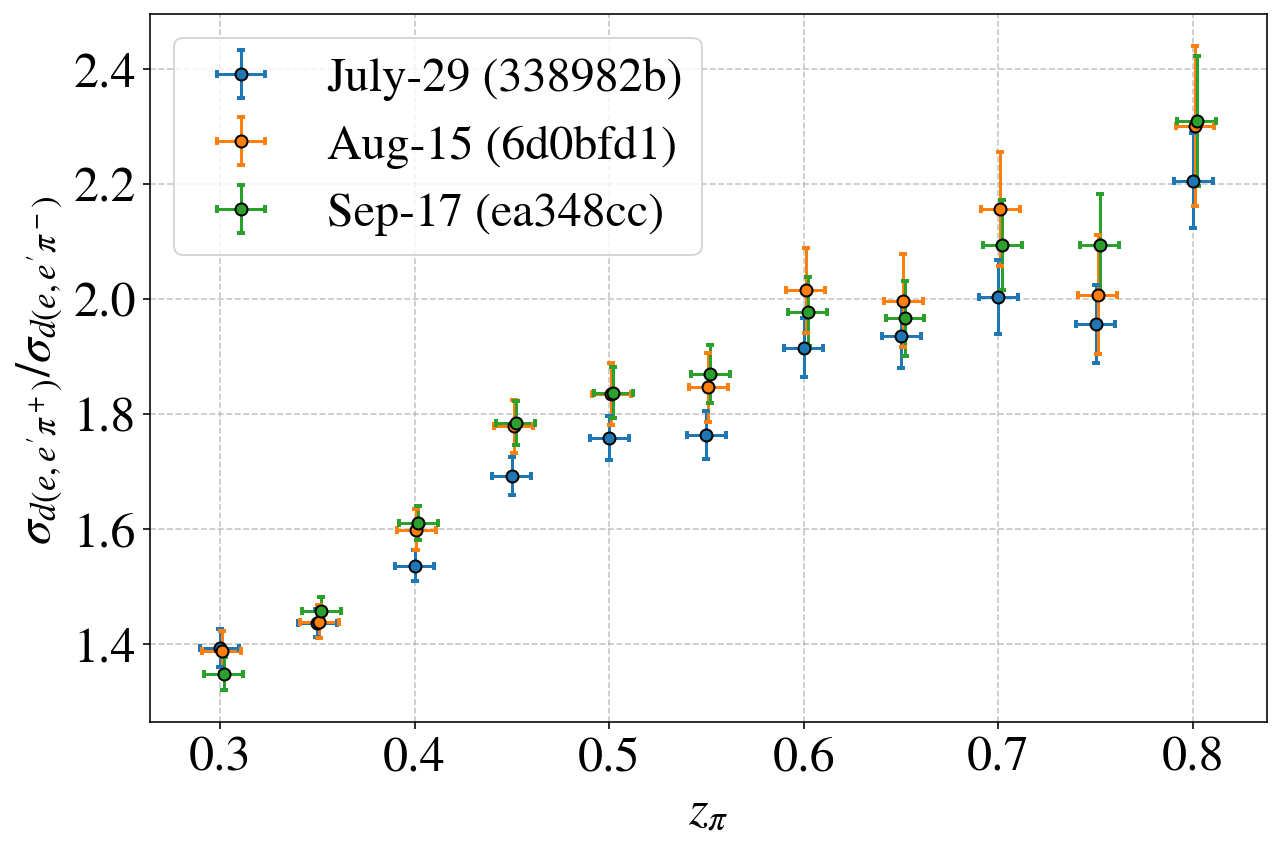

In [13]:
fig = plt.figure(figsize=(9,6), tight_layout=True)
ax = fig.add_subplot(1,1,1)

for subdirname,subdirlabel,subdircolor,sufidx in zip(subdirnames,subdirlabels,subdircolors,range(len(subdirnames))):
    suffix = subdirname
    plt.errorbar(x=np.array(z_arr[suffix])+sufidx*0.001, xerr=z_err_arr[suffix],
                 y=R_arr[suffix], yerr=(R_errup_arr[suffix],R_errdw_arr[suffix]),
                 marker='o',markeredgecolor='k',linestyle='None',
                 label=subdirlabel, capthick=2, capsize=2)

set_axes(ax,'$z_\\pi$',
             "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             do_add_grid=True, do_add_legend=True)
ax.legend(loc='upper left',fontsize=24);

# (5) Check the difference between different runs

In [14]:
data_path = '/Users/erezcohen/Desktop/data/BAND/Results/CodeVersionDifferences/DifferentRuns/'

In [15]:
z_arr,z_err_arr,R_arr,R_errup_arr,R_errdw_arr = dict(),dict(),dict(),dict(),dict()

for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    for run in [6421,6422]:#,6422,6426,6429]:
        subsetlabel = subdirname + '_run_%d'%run
        print()
        print(subdirname)
        extract_SIDIS_ratio(df_dict  = eepi_pass_cuts[subdirname], 
                            specific_run_number=run,
                            data_path= data_path,
                            x_var    = var ,
                            x_bins = x_bins,z_bins = z_bins,z_widths = z_widths,                           
                            prefix   = prefix,
                            suffix   = subsetlabel, 
                            fdebug   = 0 )

        results = load_SIDIS_ratio(prefix = prefix,                                              
                                                  suffix = subsetlabel, 
                                                  doPlotResults=False, 
                                                  data_path=data_path, fdebug=2)


        z_arr[subsetlabel],z_err_arr[subsetlabel],R_arr[subsetlabel],R_errup_arr[subsetlabel],R_errdw_arr[subsetlabel] = [],[],[],[],[]
        for key in results.keys():
            z_min = float(key[4:9])
            z_max = float(key[-4:])

            res_x034 = results[key][np.abs(results[key]['$x_B$']-0.34)<0.02]
            R,dR_up,dR_dw = float(res_x034['$R$']),float(res_x034['$\Delta R_{+}$']),float(res_x034['$\Delta R_{+}$'])
            R_arr[subsetlabel].append( R )
            R_errup_arr[subsetlabel].append( dR_up )
            R_errdw_arr[subsetlabel].append( dR_dw )        

            z_arr[subsetlabel].append( (z_max + z_min)/2 )
            z_err_arr[subsetlabel].append( (z_max - z_min)/2 )
        #}    
        print('Done run',subdirname,'.')
    #}
    print('Done',subdirname,'.')
    
print('Done.')


sidisdvcs_v29July_commit_338982b
Reading files from /Users/erezcohen/Desktop/data/BAND/Results/CodeVersionDifferences/DifferentRuns/
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810sidisdvcs_v29July_commit_338982b_run_6421 2.csv
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.640_Zmean_pips0.650_pims0.650_Zmax0.660sidisdvcs_v29July_commit_338982b_run_6421.csv
reading Untagged_SIDIS_r

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:310: RuntimeWarning: invalid value encountered in double_scalars
  R_err = R * np.sqrt( np.square(Npips_in_bin_err/np.max([Npips_in_bin,cutoff]))
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:309: RuntimeWarning: invalid value encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:311: RuntimeWarning: invalid value encountered in double_scalars
  + np.square(Npims_in_bin_err/np.max([Npims_in_bin,cutoff]) ) )


Reading files from /Users/erezcohen/Desktop/data/BAND/Results/CodeVersionDifferences/DifferentRuns/
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421.csv
reading Untagged_SIDIS_ratio_Zmin0.790_Zmean_pips0.800_pims0.800_Zmax0.810sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6421 3.csv
reading Untagged_SIDIS_ratio_Zmin0.74

/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:309: RuntimeWarning: divide by zero encountered in double_scalars
  R     = Npips_in_bin / np.max([Npims_in_bin,cutoff])


Reading files from /Users/erezcohen/Desktop/data/BAND/Results/CodeVersionDifferences/DifferentRuns/
reading Untagged_SIDIS_ratio_Zmin0.340_Zmean_pips0.350_pims0.350_Zmax0.360sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.740_Zmean_pips0.750_pims0.750_Zmax0.760sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.290_Zmean_pips0.305_pims0.305_Zmax0.310sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.390_Zmean_pips0.400_pims0.400_Zmax0.410sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.440_Zmean_pips0.450_pims0.450_Zmax0.460sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.490_Zmean_pips0.500_pims0.500_Zmax0.510sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.590_Zmean_pips0.600_pims0.600_Zmax0.610sidisdvcs_v15Aug2022_commit_6d0bfd1_run_6422.csv
reading Untagged_SIDIS_ratio_Zmin0.540_

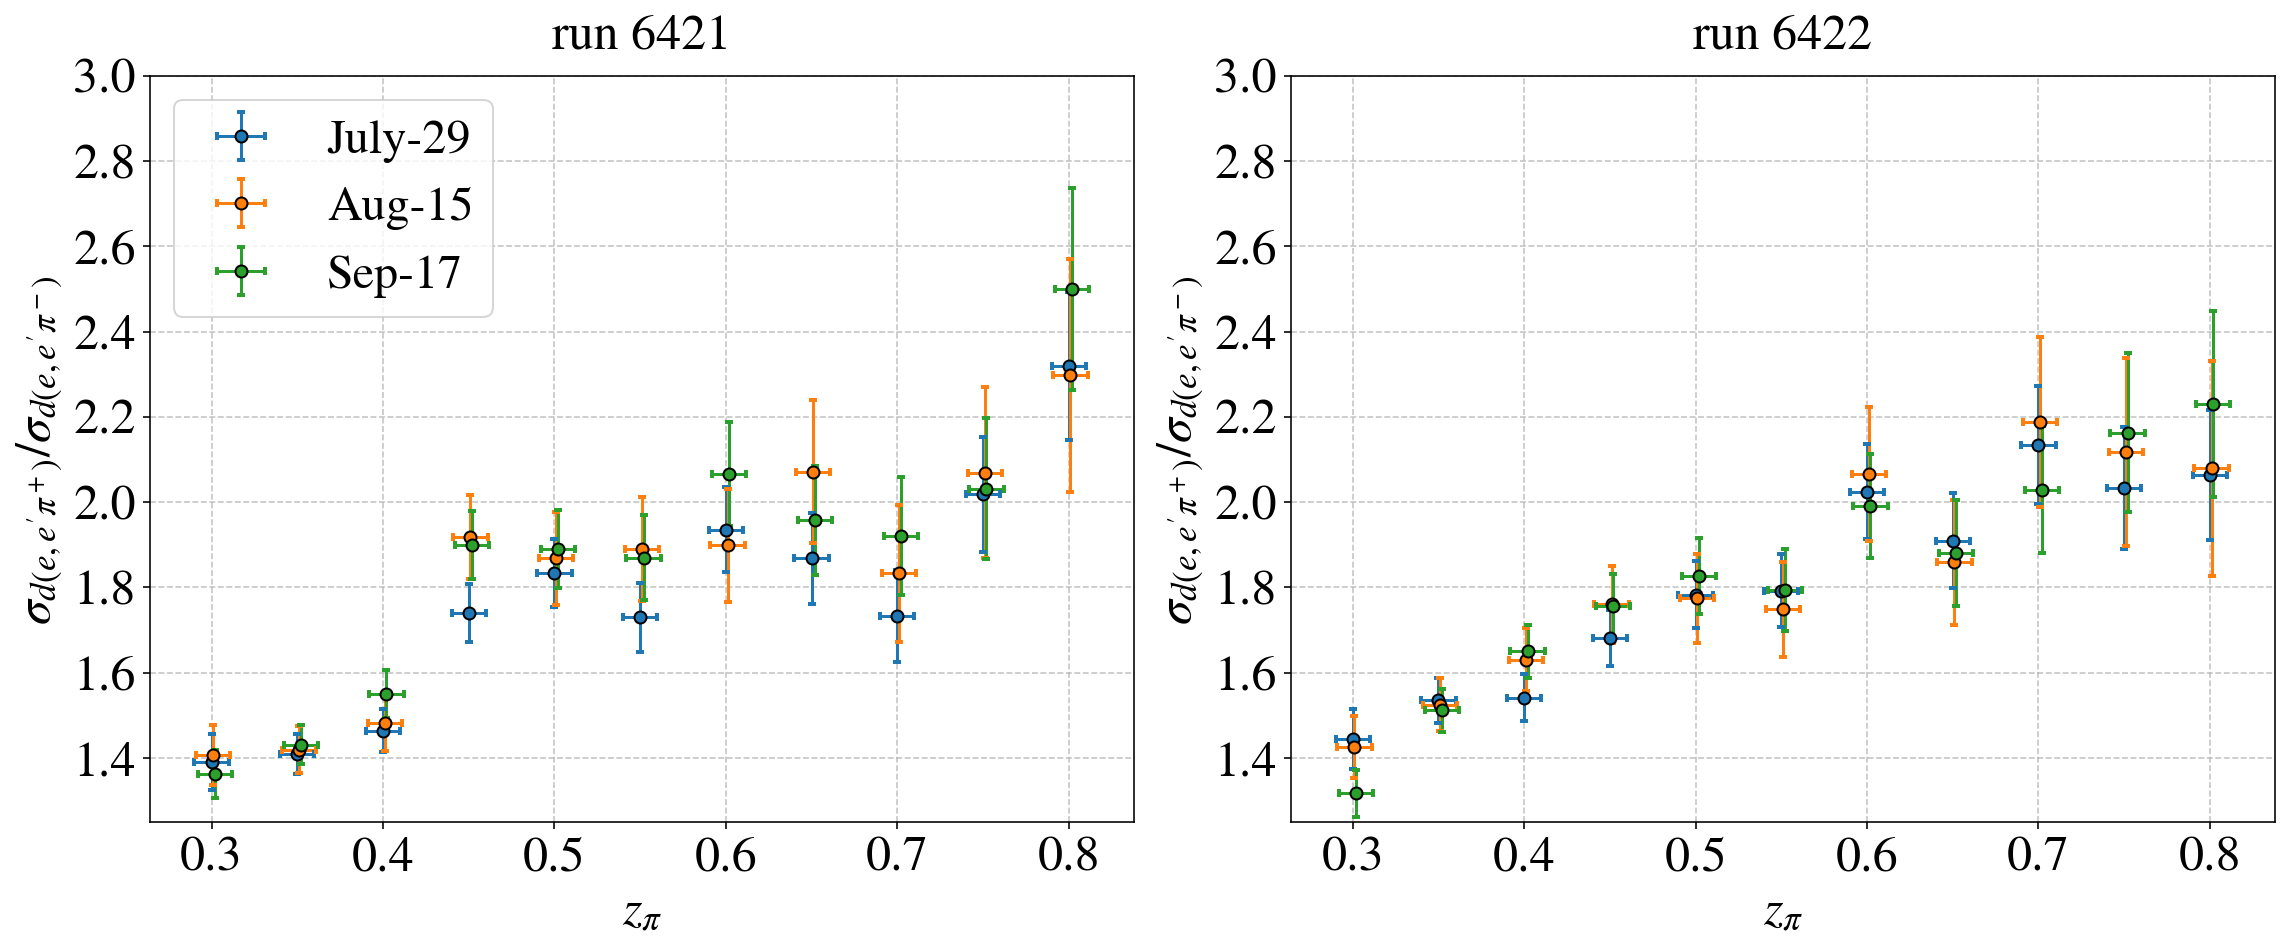

In [16]:
ylim = (1.25,3)
fig = plt.figure(figsize=(16,12), tight_layout=True)
for run,run_idx in zip([6421,6422],[1,2,3,4]):#,6422,6426,6429
    ax = fig.add_subplot(2,2,run_idx)

    for subdirname,subdirlabel,subdircolor,sufidx in zip(subdirnames,subdirlabels,subdircolors,range(len(subdirnames))):
        subsetlabel = subdirname + '_run_%d'%run
        plt.errorbar(x=np.array(z_arr[subsetlabel])+sufidx*0.001, xerr=z_err_arr[subsetlabel],
                     y=R_arr[subsetlabel], yerr=(R_errup_arr[subsetlabel],R_errdw_arr[subsetlabel]),
                     marker='o',markeredgecolor='k',linestyle='None',
                     label=subdirlabel.split()[0], capthick=2, capsize=2)

    set_axes(ax,'$z_\\pi$',
                 "$\\sigma_{d(e,e'\\pi^+)}/\\sigma_{d(e,e'\\pi^-)}$ ",
             title='run %d'%run,
                 do_add_grid=True, do_add_legend=False, ylim=ylim)
    if run_idx==1: ax.legend(loc='upper left',fontsize=24);
    
    

# (6) Are there events in 6422 run file with the run-number being 6421?

In [17]:
run6421_pips = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/sidisdvcs/sidisdvcs_v17Sep2022_commit_ea348cc/skimmed_SIDIS_sidisdvcs_006421_e_piplus_selected_eepi_kinematics.csv')
run6422_pips = pd.read_csv('/Users/erezcohen/Desktop/data/BAND/SIDIS_skimming/sidisdvcs/sidisdvcs_v17Sep2022_commit_ea348cc/skimmed_SIDIS_sidisdvcs_006422_e_piplus_selected_eepi_kinematics.csv')

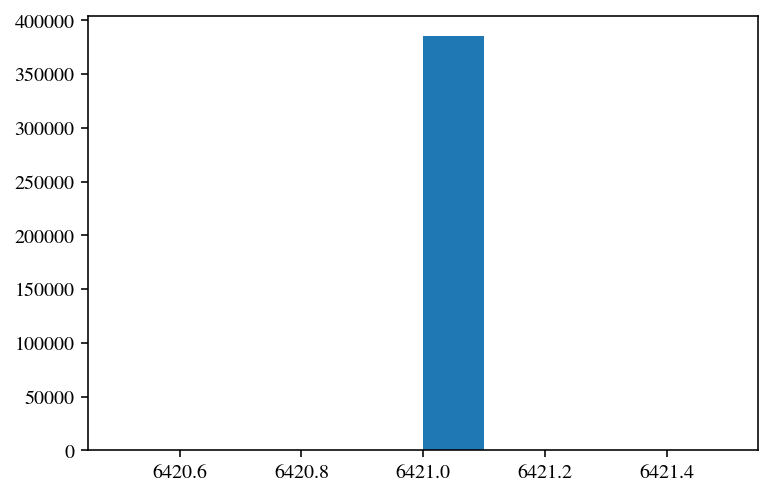

In [18]:
plt.hist(run6421_pips.runnum);

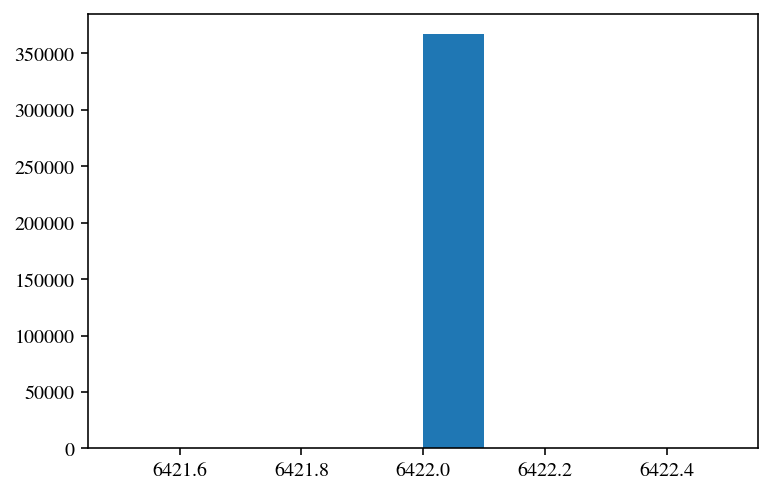

In [19]:
plt.hist(run6422_pips.runnum);

# (7) Is one of the cuts erroneously filtering good events just because of memory issue? i.e. the p-theta cut?

In [20]:


# # ----------------------- #
# def apply_p_theta_acceptance_cut_single_set( df_dict=None,
#                                  NeventsMax=-1,
#                                  fdebug=1):
#     '''
#         df_dict_after_cut = apply_p_theta_acceptance_cut(df_dict)
        
#         Apply a π+/π- acceptance matching cut on the in p-\theta plane
#         last update Sep-22, 2022
        
#     '''
#     import numpy as np
#     print("Apply a π+/π- acceptance matching cut on the in p-theta plane")
#     df_dict_after_cut = dict()
        
#     for pi_ch in pi_charge_names:
        
#         if NeventsMax > 0: NeventsMax = np.min( [NeventsMax, len(df_dict[pi_ch])] )
#         else:              NeventsMax = len(df_dict[pi_ch])
#         df = df_dict[pi_ch][0:NeventsMax]
#         if fdebug: print('Applying p-theta on cut for '+pi_ch+' on %d events'%NeventsMax)
#         # good_indices = np.array([])
#         df_after_cut = pd.DataFrame();
#         for sector in range(1,7):#{
#             df_in_sector   = df[df.pi_DC_sector == sector]
#             if fdebug: print(len(df_in_sector),'in sector',sector)
#             theta_min_pi   = pi_min_theta_cut( pi_charge = 'any', sector=sector, p=np.array(df_in_sector.pi_P) )
#             # good_indices_in_sector = []
#             # good_indices_in_sector = df_in_sector[ df_in_sector.pi_Theta*r2d > theta_min_pi ].index
#             # good_indices = np.concatenate([good_indices,good_indices_in_sector])
#             df_in_sector_pass_cut = df_in_sector[ df_in_sector.pi_Theta*r2d > theta_min_pi ]
#             df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
#         #}
#         # good_indices = np.unique(good_indices)
#         # df_after_cut = df.loc[good_indices]
#         df_dict_after_cut[pi_ch] = df_after_cut
#     return df_dict_after_cut
# # ----------------------- #

In [21]:
eepi_p_theta_cut = dict()
for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
        print(subdirname)
        eepi_p_theta_cut[subdirname] = apply_p_theta_acceptance_cut_single_set( df_dict = eepi[subdirname], fdebug=2 )

print('done.')

sidisdvcs_v29July_commit_338982b
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 1527104 events
264627 in sector 1
259324 in sector 2
256739 in sector 3
254629 in sector 4
260276 in sector 5
231509 in sector 6
Applying p-theta on cut for piminus on 682118 events
116383 in sector 1
114463 in sector 2
112993 in sector 3
113829 in sector 4
113204 in sector 5
111246 in sector 6
sidisdvcs_v15Aug2022_commit_6d0bfd1
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 1012857 events
174281 in sector 1
171537 in sector 2
171201 in sector 3
170425 in sector 4
172753 in sector 5
152660 in sector 6
Applying p-theta on cut for piminus on 424015 events
72101 in sector 1
71354 in sector 2
70438 in sector 3
70534 in sector 4
70302 in sector 5
69286 in sector 6
sidisdvcs_v17Sep2022_commit_ea348cc
Apply a π+/π- acceptance matching cut on the in p-theta plane
Applying p-theta on cut for piplus on 1490417 e

In [22]:
print('only',pi_prints[0])

for subdirname,subdirlabel,subdircolor in zip(subdirnames,subdirlabels,subdircolors):
    print(subdirlabel)
    Nevents = dict()
    
    df_statistics = pd.DataFrame({'run':[],'No cuts':[],'p-theta cut':[],'after cuts':[]});
    for pi_ch,pi_print,pi_idx in zip(pi_charge_names,pi_prints,[0]):
        
        df_before_cuts       = eepi[subdirname][pi_ch] 
        df_after_p_theta_cut = eepi_p_theta_cut[subdirname][pi_ch] 
        df_after_cuts        = eepi_pass_cuts[subdirname][pi_ch] 

        for run in [6421,6422]:
            df_statistics.loc[len(df_statistics.index)] = [run,
                                                  len(df_before_cuts[df_before_cuts.runnum==run]),
                                                  len(df_after_p_theta_cut[df_after_p_theta_cut.runnum==run]),
                                                  len(df_after_cuts[df_after_cuts.runnum==run])];
            # print('\t','run %d:'%run,len(df[df.runnum==run]))
        display(df_statistics[['run','No cuts','p-theta cut','after cuts']])
    print()

only π+
July-29 (338982b)


,run,No cuts,p-theta cut,after cuts
0,6421.0,394332.0,286985.0,286985.0
1,6422.0,376131.0,273974.0,273974.0



Aug-15 (6d0bfd1)


,run,No cuts,p-theta cut,after cuts
0,6421.0,261556.0,177204.0,177204.0
1,6422.0,249349.0,169273.0,169273.0



Sep-17 (ea348cc)


,run,No cuts,p-theta cut,after cuts
0,6421.0,385297.0,261536.0,261536.0
1,6422.0,366918.0,249279.0,249279.0
